Ayansk11

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/BTC-USD.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-29,23031.44922,23919.89063,22985.07031,23774.56641,23774.56641,27423687259
1,2023-01-30,23774.64844,23789.34766,22657.58203,22840.13867,22840.13867,27205595568
2,2023-01-31,22840.79688,23225.02148,22765.56836,23139.28320,23139.28320,22837828665
3,2023-02-01,23137.83594,23764.53906,22877.75000,23723.76953,23723.76953,26683255504
4,2023-02-02,23720.82422,24167.21094,23468.59570,23471.87109,23471.87109,32066936882


In [4]:
df.shape

(366, 7)

In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
361,2024-01-25,40075.55078,40254.48047,39545.66406,39933.80859,39933.80859,18491782013
362,2024-01-26,39936.81641,42209.38672,39825.69141,41816.87109,41816.87109,25598119893
363,2024-01-27,41815.62500,42195.63281,41431.28125,42120.05469,42120.05469,11422941934
364,2024-01-28,42126.12500,42797.17578,41696.91016,42035.59375,42035.59375,16858971687
365,2024-01-29,42030.91406,42457.75000,41897.93750,42259.04688,42259.04688,14911157248


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,30601.534741,31114.292387,30140.609952,30654.710185,30654.710185,1.863308e+10
std,6373.605897,6519.995878,6218.219974,6389.897004,6389.897004,9.061264e+09
min,20187.876950,20370.595700,19628.253910,20187.244140,20187.244140,5.331173e+09
25%,26516.091307,26823.505862,26172.211425,26535.559082,26535.559082,1.214883e+10
50%,28420.998045,28984.437500,27980.690430,28419.224610,28419.224610,1.637686e+10
75%,34503.236328,34917.837892,34049.373045,34529.565430,34529.565430,2.290168e+10
max,46987.640630,48969.371090,45678.644530,46970.503910,46970.503910,5.462223e+10


Check for Missing Values

In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       366 non-null    datetime64[ns]
 1   Open       366 non-null    float64       
 2   High       366 non-null    float64       
 3   Low        366 non-null    float64       
 4   Close      366 non-null    float64       
 5   Adj Close  366 non-null    float64       
 6   Volume     366 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 20.1 KB


**Plotting Graphs**

Line Plot of Closing Prices: To see the trend over time.

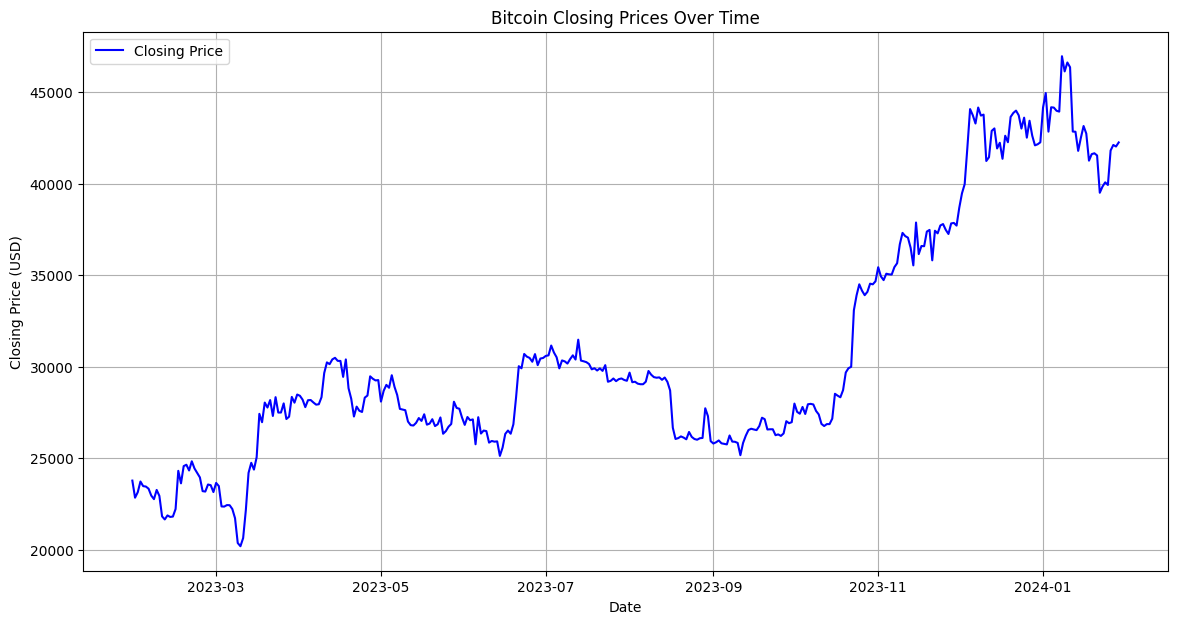

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.title('Bitcoin Closing Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()

Histogram of Daily Returns: To understand the distribution of returns.

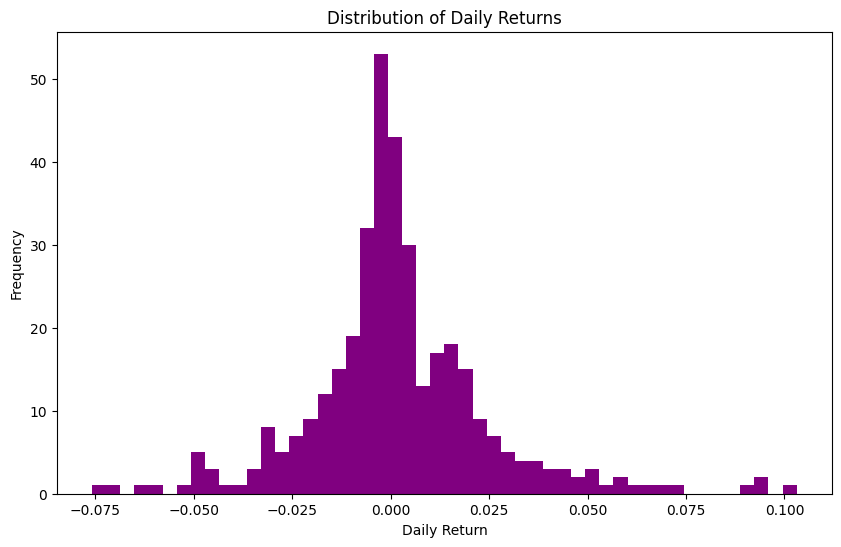

In [14]:
df['Daily Return'] = df['Close'].pct_change()

# Plot histogram of daily returns
plt.figure(figsize=(10, 6))
plt.hist(df['Daily Return'].dropna(), bins=50, color='purple')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns')
plt.show()

Volume vs. Closing Price: To see the relationship between trading volume and price.

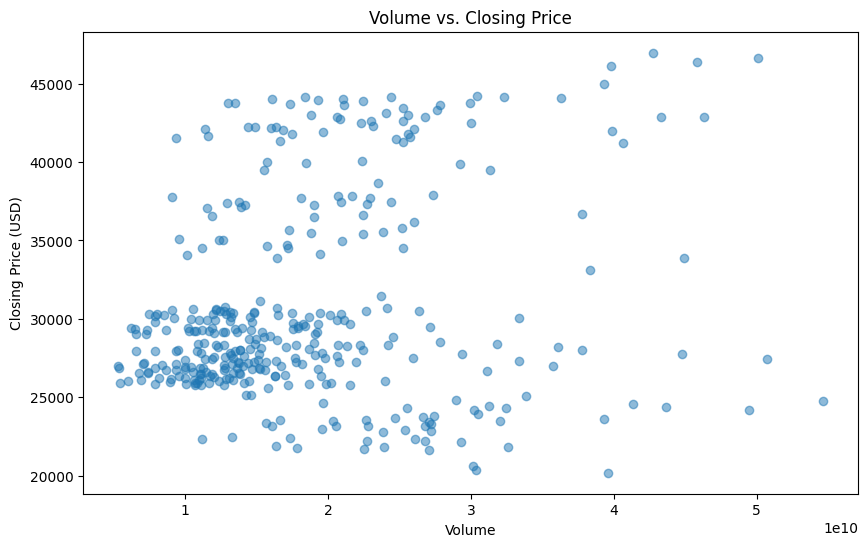

In [16]:
# Scatter plot of volume vs. closing price
plt.figure(figsize=(10, 6))
plt.scatter(df['Volume'], df['Close'], alpha=0.5)
plt.xlabel('Volume')
plt.ylabel('Closing Price (USD)')
plt.title('Volume vs. Closing Price')
plt.show()

Correlation Heatmap: To see how different variables are correlated.

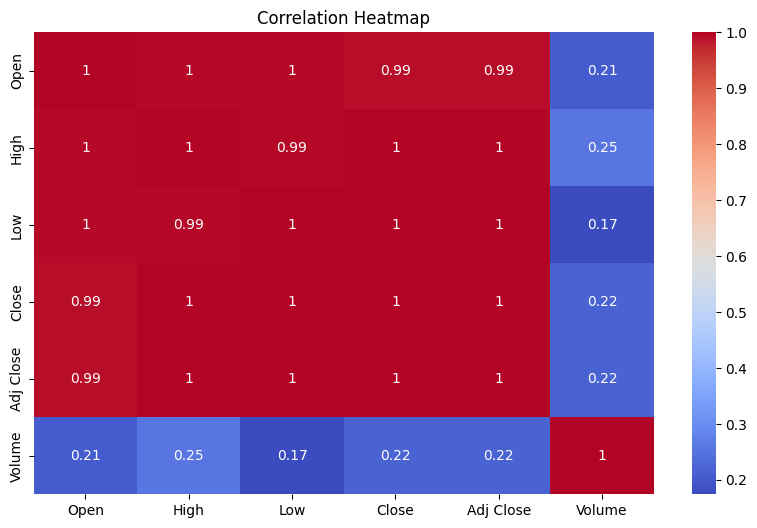

In [18]:
import seaborn as sns

# Calculate correlation matrix
corr_matrix = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Graphs and Insights
1. Line Plot of Bitcoin Closing Prices

Insight: The line plot shows the trend of Bitcoin's closing prices over time. There are clear fluctuations, with noticeable peaks and valleys indicating periods of high volatility.


2. Histogram of Daily Returns

Insight: The histogram of daily returns displays a bell-shaped distribution centered around zero, suggesting that daily returns are normally distributed. This indicates a mix of positive and negative returns, reflecting Bitcoin's volatile nature.


3. Volume vs. Closing Price

Insight: The scatter plot shows no strong relationship between trading volume and closing price, suggesting that high trading volumes do not necessarily correspond to high or low prices.


4. Correlation Heatmap

Insight: The heatmap reveals strong positive correlations among Open, High, Low, and Close prices, indicating that they move together. Volume, however, shows a weaker correlation with these prices.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Drop rows with NaN values
data = df.dropna()

# Define features and target
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [24]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [25]:
# Predict on test data
y_pred = model.predict(X_test)

# Calculate R-squared
r_squared = model.score(X_test, y_test)

# Print R-squared
print(f'R-squared: {r_squared:.2f}')


R-squared: 1.00


Model Performance

The model achieved an R-squared value of approximately 1.00, indicating that the linear regression model explains 100% of the variance in the closing price. This is an exceptionally high fit, suggesting that the selected features (Open, High, Low, and Volume) are very effective in predicting the Close price.

In [26]:
w = model.coef_

In [27]:
b = model.intercept_

In [31]:
import numpy as np

def predict_closing_price(w, b, X):

  p = np.dot(X, w) + b

  return p

In [33]:
# input data should be in the form/order [Open, High, Low, Volume]

input = [40075.55078, 40254.48047,	39545.66406, 18491782013]

result = predict_closing_price(w, b, input)

print(f"The Closing Price Predicted by the model is {result}")



The Closing Price Predicted by the model is 39816.292876434345


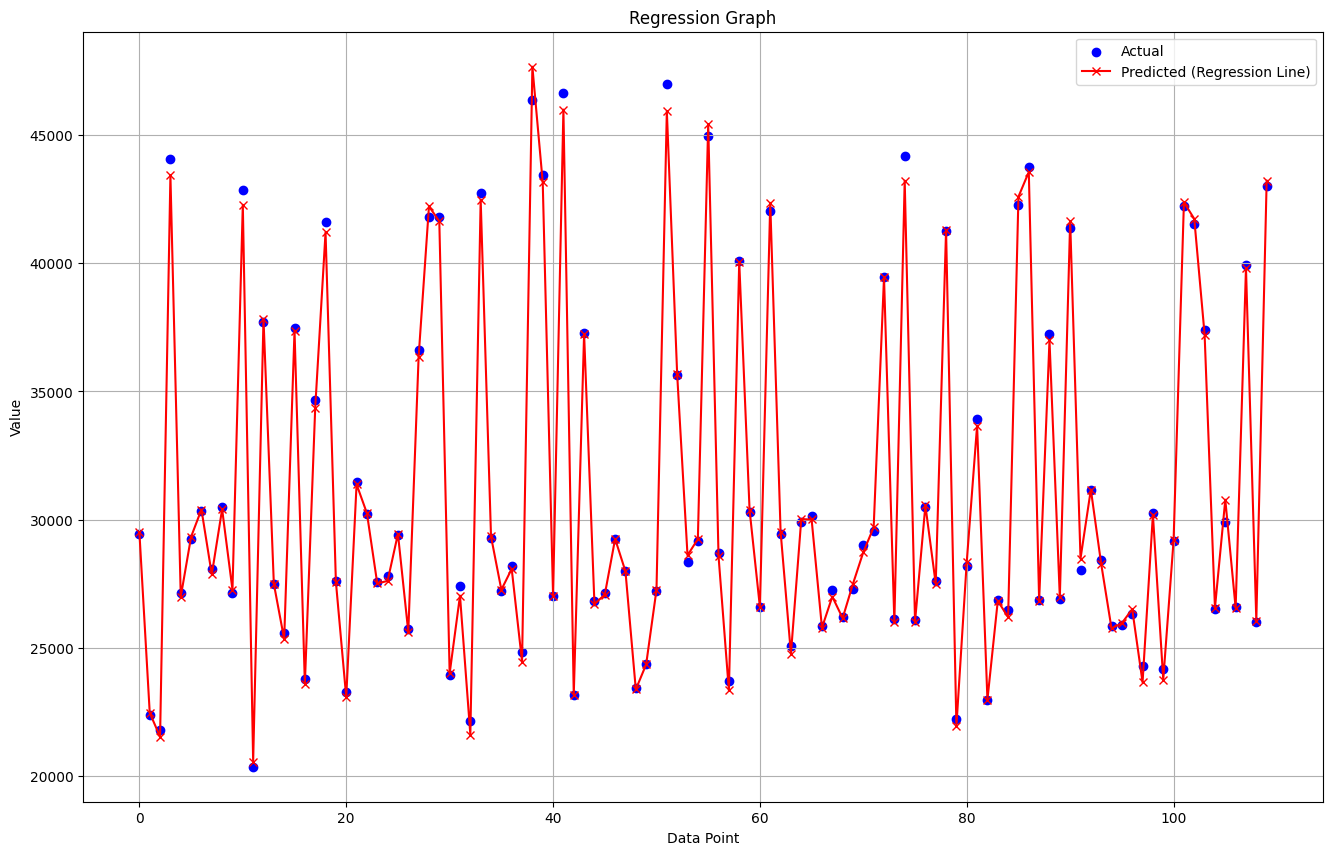

In [35]:
import matplotlib.pyplot as plt

# Ensure 'y_test' and 'y_pred' are aligned
# In case 'y_pred' and 'y_test' are not in order, sort them accordingly

# Define the size of the plot
plt.figure(figsize=(16, 10))

# Plot the actual values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', marker='o')

# Plot the predicted values
plt.plot(range(len(y_test)), y_pred, color='red', label='Predicted (Regression Line)', marker='x')

# Adding labels
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Regression Graph')

# Adding a legend
plt.legend()

# Adding grid
plt.grid(True)

# Display the plot
plt.show()
